### **PROJECT 1 PROPOSAL LEVEL 2**


**Idea: Predicting House Prices with Linear Regression**


 **Description:**


The objective of this project is to build a predictive model using linear regression to estimate a numerical outcome based on a dataset with relevant features. Linear regression is a fundamental machine learning algorithm, and this project provides hands-on experience in developing, evaluating, and interpreting a predictive model.


 **Dataset:-** https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression


 **Key Concepts and Challenges:**


1. Data Collection: Obtain a dataset with numerical features and a target variable for prediction.


2. Data Exploration and Cleaning: Explore the dataset to understand its structure, handle missing values, and ensure data quality.


3. Feature Selection: Identify relevant features that may contribute to the predictive model.


4. Model Training: Implement linear regression using a machine learning library (e.g., Scikit-Learn).


5. .Model Evaluation: Evaluate the model's performance on a separate test dataset using metrics such as Mean Squared Error or R-squared.


6. Visualization: Create visualizations to illustrate the relationship between the predicted and actual values.

In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the Housing.csv dataset 
df = pd.read_csv("Housing.csv") 

In [3]:
print(" Shape:", df.shape)
print(" Columns:", df.columns.tolist())
print(df.head())

 Shape: (545, 13)
 Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        

In [4]:
#  Data Cleaning & Encoding
# Convert categorical to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

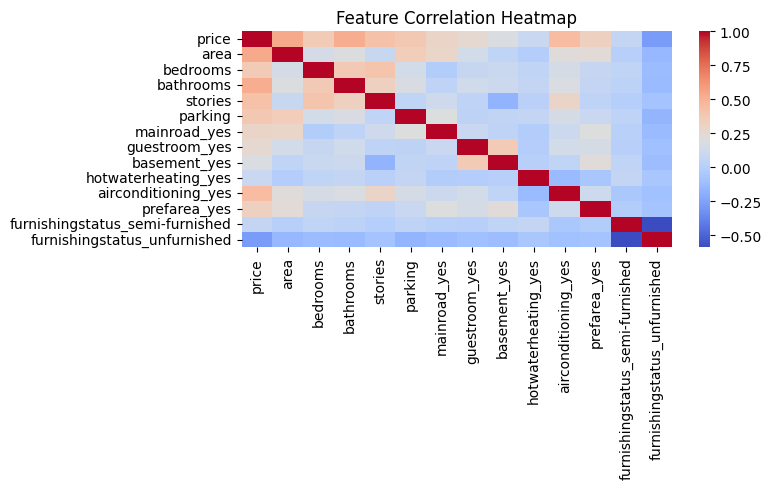

In [5]:
#  Exploratory Data Analysis 
plt.figure(figsize=(8, 5))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [6]:
#  Feature & Target
X = df_encoded.drop('price', axis=1)
y = np.log1p(df_encoded['price'])

In [7]:
# Apply StandardScaler to features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Train
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate
print(" Ridge Regression:")
print("   MSE:", mean_squared_error(y_test, y_pred_ridge))
print("   R²:", r2_score(y_test, y_pred_ridge))

print("\n Lasso Regression:")
print("   MSE:", mean_squared_error(y_test, y_pred_lasso))
print("   R²:", r2_score(y_test, y_pred_lasso))

 Ridge Regression:
   MSE: 0.06330839591738077
   R²: 0.6721278083506508

 Lasso Regression:
   MSE: 0.13291238265471594
   R²: 0.3116509498169955


In [11]:
#  Model Training
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
#  Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-squared Score: {r2:.4f}")

 Mean Squared Error (MSE): 0.06
 R-squared Score: 0.6722


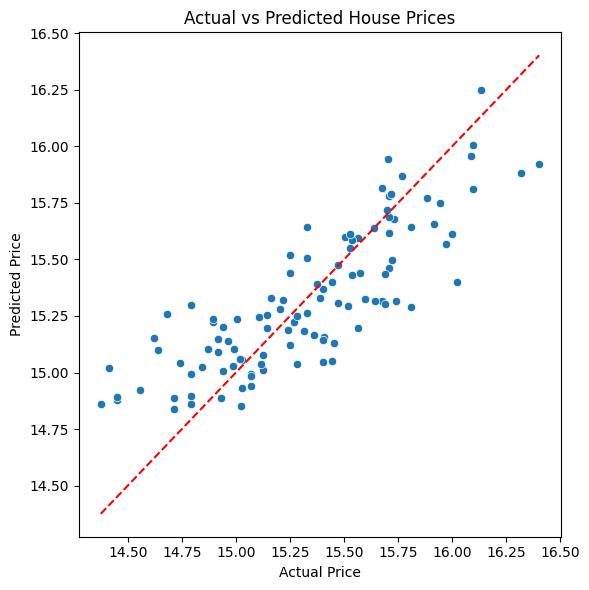

In [13]:
#  Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Reference line
plt.tight_layout()
plt.show()

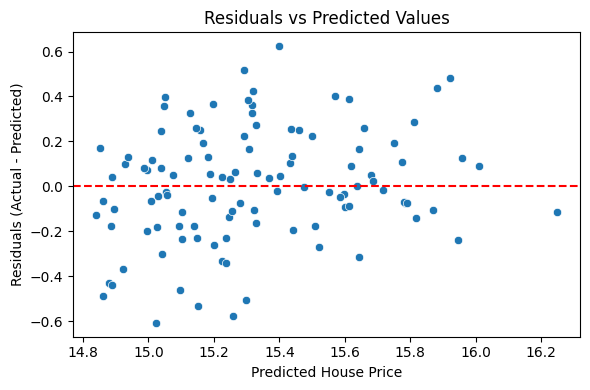

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted House Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

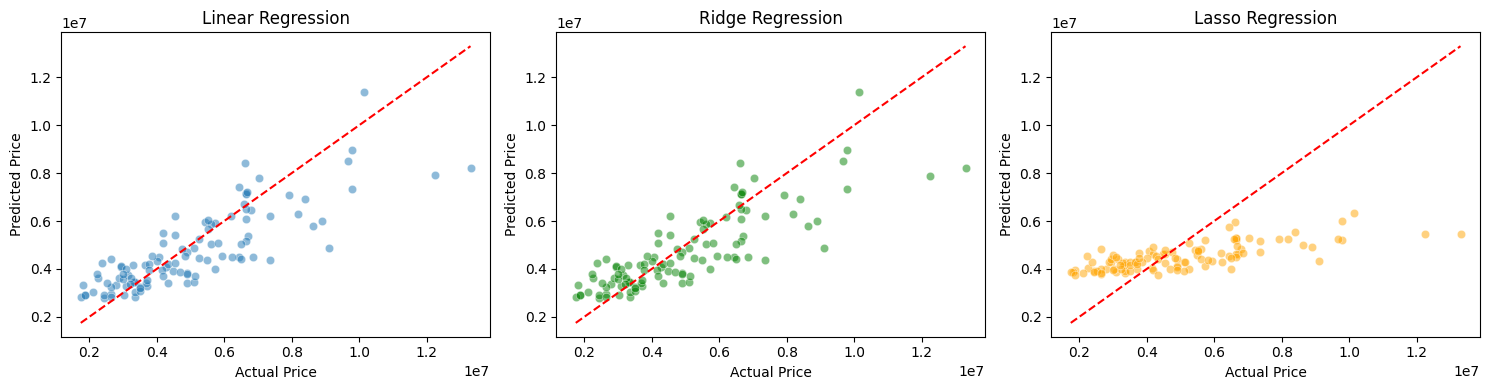

In [16]:
plt.figure(figsize=(15, 4))

# Inverse transform log(y) back to original scale
y_test_orig = np.expm1(y_test)
y_pred_lin_orig = np.expm1(y_pred)            # from Linear Regression
y_pred_ridge_orig = np.expm1(y_pred_ridge)
y_pred_lasso_orig = np.expm1(y_pred_lasso)

# --- Linear ---
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_orig, y=y_pred_lin_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# --- Ridge ---
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test_orig, y=y_pred_ridge_orig, alpha=0.5, color='green')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.title("Ridge Regression")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# --- Lasso ---
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_orig, y=y_pred_lasso_orig, alpha=0.5, color='orange')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.title("Lasso Regression")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()